In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from sklearn.decomposition import PCA

In [16]:
df = pd.read_csv(r'data\BankChurners_preprocessed.csv')


In [17]:
numeric_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

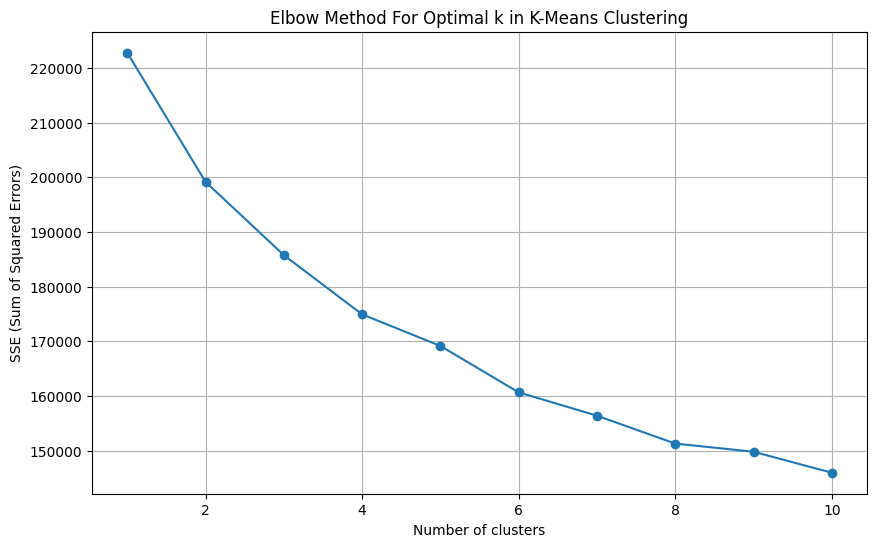

In [18]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# Determine the optimal number of clusters using the Elbow method for K-means
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method For Optimal k in K-Means Clustering')
plt.grid(True)
plt.show()


As you can see there is no clusters in the dataset. 
If we want to cluster our data into two clusters we can use the code below: 

## two clusters 

Silhouette Score: 0.15
Davies-Bouldin Index: 2.50
Calinski-Harabasz Index: 1201.20
Inertia: 199165.58


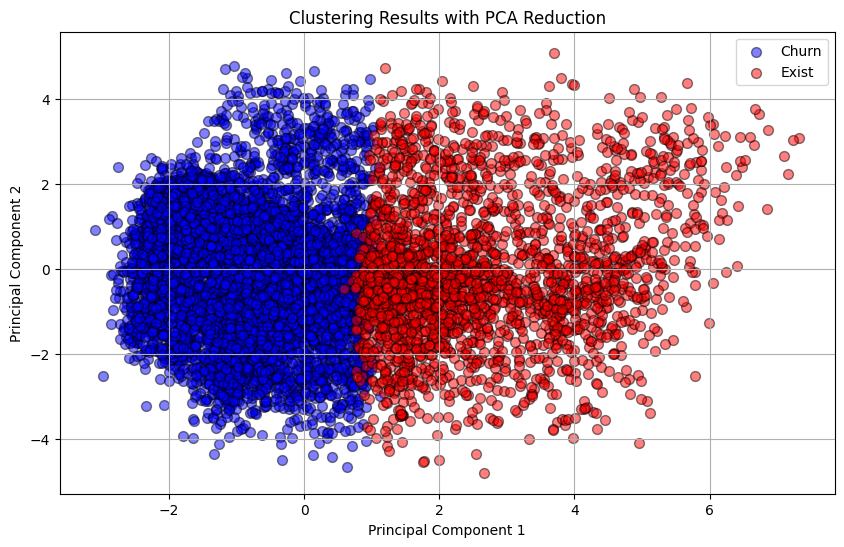

In [19]:
def plot_clusters(data_scaled, n_clusters=2):
    try:
        # Applying K-Means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data_scaled)

        # Retrieving cluster labels
        cluster_labels = kmeans.labels_

        # Validation metrics
        silhouette_avg = silhouette_score(data_scaled, cluster_labels)
        davies_bouldin = davies_bouldin_score(data_scaled, cluster_labels)
        calinski_harabasz = calinski_harabasz_score(data_scaled, cluster_labels)
        inertia = kmeans.inertia_

        print(f"Silhouette Score: {silhouette_avg:.2f}")
        print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")
        print(f"Inertia: {inertia:.2f}")

        # Applying PCA for dimensionality reduction for visualization
        pca = PCA(n_components=2)
        data_pca = pca.fit_transform(data_scaled)

        # Plotting
        plt.figure(figsize=(10, 6))
        colors = ['blue', 'red', 'green', 'purple', 'orange']  # Extend as needed
        labels = ['Churn', 'Exist'] + [f'Cluster {i+1}' for i in range(2, n_clusters)]  # Dynamic labeling
        for cluster, color, label in zip(range(n_clusters), colors, labels):
            plt.scatter(data_pca[cluster_labels == cluster, 0], data_pca[cluster_labels == cluster, 1], 
                        color=color, label=label, alpha=0.5, edgecolor='k', s=50)
        plt.title('Clustering Results with PCA Reduction')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
plot_clusters(data_scaled, n_clusters=2)

## three clusters 

Silhouette Score: 0.09


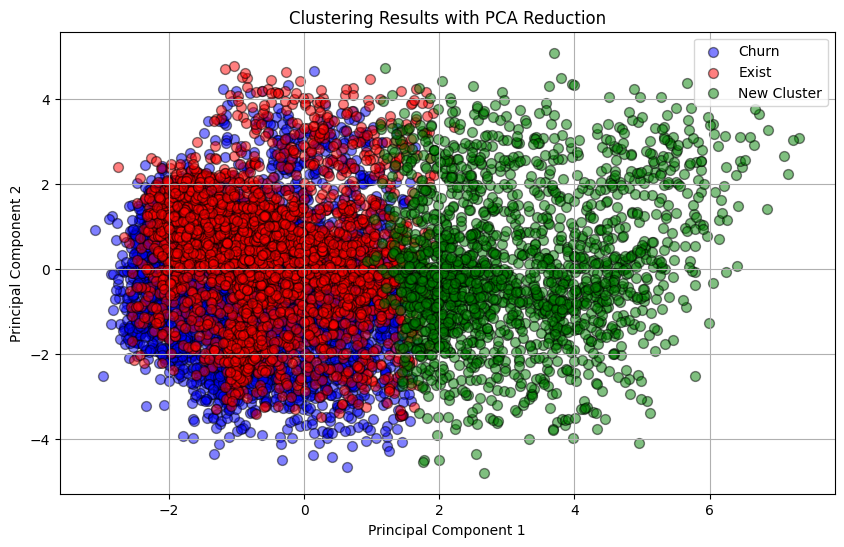

In [20]:
def plot_clusters(data_scaled, n_clusters=3):  # Adjusted for three clusters
    try:
        # Applying K-Means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data_scaled)

        # Retrieving cluster labels
        cluster_labels = kmeans.labels_

        # Calculating the Silhouette Score for validation
        silhouette_avg = silhouette_score(data_scaled, cluster_labels)
        print(f"Silhouette Score: {silhouette_avg:.2f}")

        # Applying PCA for dimensionality reduction for visualization
        pca = PCA(n_components=2)
        data_pca = pca.fit_transform(data_scaled)

        # Plotting
        plt.figure(figsize=(10, 6))
        colors = ['blue', 'red', 'green', 'purple', 'orange']  # Extend as needed
        labels = ['Churn', 'Exist', 'New Cluster'] + [f'Cluster {i+1}' for i in range(3, n_clusters)]  # Dynamic labeling
        for cluster, color, label in zip(range(n_clusters), colors, labels):
            plt.scatter(data_pca[cluster_labels == cluster, 0], data_pca[cluster_labels == cluster, 1], 
                        color=color, label=label, alpha=0.5, edgecolor='k', s=50)
        plt.title('Clustering Results with PCA Reduction')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
plot_clusters(data_scaled, n_clusters=3)



**Silhouette Score (0.15):** This score ranges from -1 to +1. A score closer to +1 suggests that the clusters are well separated from each other and clearly defined. A score around 0 indicates that the clusters are overlapping, and negative values suggest that data points might have been assigned to the wrong cluster.
A score of 0.15 is quite low, suggesting that the clusters are not very distinct and there is considerable overlap between them. This could imply that the model is struggling to find well-separated groups in the data.

**Davies-Bouldin Index (2.50):** 
Ideally, this index should be as low as possible. Lower values indicate that the clusters are more compact and better separated, which is desirable in a good clustering setup.
A value of 2.50 suggests that the clusters are neither compact nor very well separated. This aligns with the low silhouette score and indicates that the clustering configuration might not be optimal.

**Calinski-Harabasz Index (1201.20):** 
This index is higher when clusters are dense and well-separated, which is typically seen as good. The absolute value is more interpretable relative to other scores from different clustering setups on the same dataset.
A score of 1201.20 might seem high, but without comparative scores from other runs or models, it's challenging to evaluate definitively. Generally, however, a higher value would indicate better clustering performance.

**Inertia (199165.58):**
This metric measures the sum of squared distances of samples to their nearest cluster center. Lower inertia means a model with tighter clusters.
The value of 199165.58 suggests that there is a significant amount of variation within each cluster, which again supports the evidence that the clusters are not very tight or well-defined.

**Overall Interpretation:**
The clustering model we've used appears to be struggling to clearly define and separate the clusters based on the given data. The relatively low silhouette score and moderate Davies-Bouldin index suggest that the clusters might be overlapping or not distinctly separated. This could be due to a variety of reasons such as the inherent structure of the data, choice of features, number of clusters chosen, or even the clustering algorithm itself.

Silhouette Score: 0.10


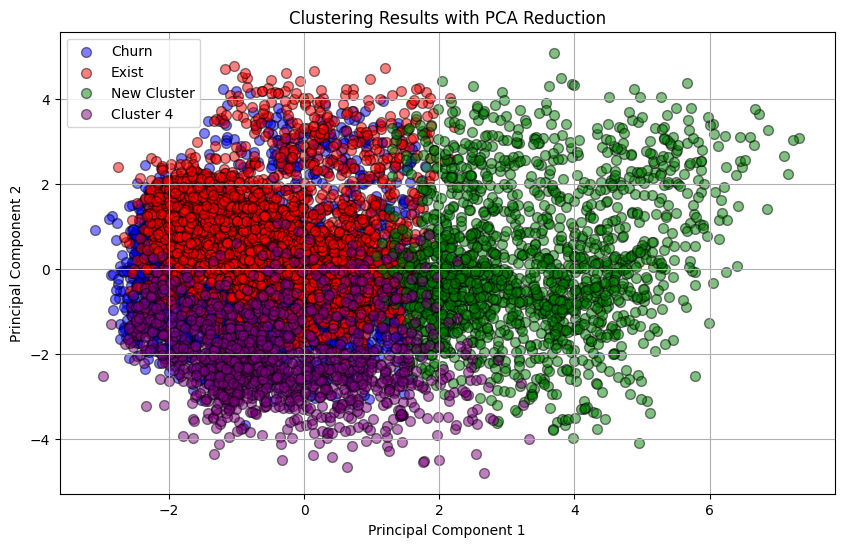

In [21]:
def plot_clusters(data_scaled, n_clusters=4):  # Adjusted for three clusters
    try:
        # Applying K-Means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data_scaled)

        # Retrieving cluster labels
        cluster_labels = kmeans.labels_

        # Calculating the Silhouette Score for validation
        silhouette_avg = silhouette_score(data_scaled, cluster_labels)
        print(f"Silhouette Score: {silhouette_avg:.2f}")

        # Applying PCA for dimensionality reduction for visualization
        pca = PCA(n_components=2)
        data_pca = pca.fit_transform(data_scaled)

        # Plotting
        plt.figure(figsize=(10, 6))
        colors = ['blue', 'red', 'green', 'purple', 'orange']  # Extend as needed
        labels = ['Churn', 'Exist', 'New Cluster'] + [f'Cluster {i+1}' for i in range(3, n_clusters)]  # Dynamic labeling
        for cluster, color, label in zip(range(n_clusters), colors, labels):
            plt.scatter(data_pca[cluster_labels == cluster, 0], data_pca[cluster_labels == cluster, 1], 
                        color=color, label=label, alpha=0.5, edgecolor='k', s=50)
        plt.title('Clustering Results with PCA Reduction')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
plot_clusters(data_scaled, n_clusters=4)